In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np


In [2]:
import rompy as rp

In [51]:
# x = np.random.random((100, 2))
x = np.linspace(0, 1, 5)
xx, yy = np.meshgrid(x, x)
xx = xx.ravel()
yy = yy.ravel()
z = np.sin(5 * xx) + .4 * np.sin(yy)

In [52]:
# validation set
x_val = np.linspace(0, 1, 20)
xx_val, yy_val = np.meshgrid(x_val, x_val)
xx_val = xx_val.ravel()
yy_val = yy_val.ravel()
z_val = np.sin(5 * xx_val) + .4 * np.sin(yy_val)

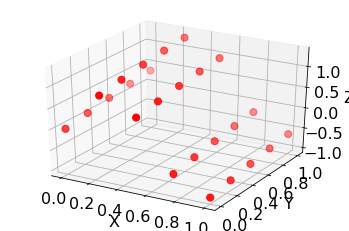

In [53]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(xx, yy, z, c="r", s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()

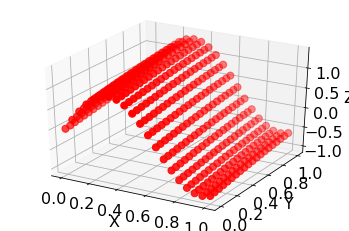

In [54]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(xx_val, yy_val, z_val, c="r", s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [64]:
def polyfit2d_interpolant(x0,x1,z1,deg):
    interpolant = rp.MultivariateFits([x0,x1], z1, fit='polyfit2d', deg=deg)
    return interpolant

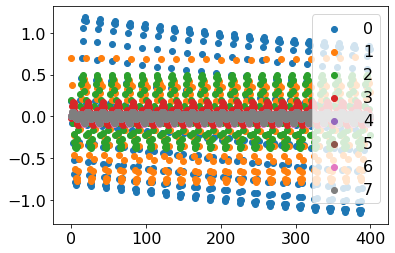

In [68]:
plt.figure()
degs = range(8)
for deg in degs:
    rp_int = polyfit2d_interpolant(xx, yy, z, deg=deg)
    prediction = rp_int([xx_val, yy_val])
    
    plt.scatter(range(len(z_val)), prediction - z_val, label=deg)
plt.legend()
plt.show()
plt.close()